In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing


### Creating Train, Validation and Test Folders (One Time Execution)

### Using the following code train, validation and test data folders were divided into ratio 70:15:15

In [ ]:
import os
import numpy as np
import shutil
import random


source = '/content/drive/My Drive/Thesis_Natural_Images/Natural_images'
data_folder = '/content/drive/My Drive/Thesis_Natural_Images/Dataset'
classes_list = ['/airplane','/car','/cat','/dog','/flower','/fruit','/motorbike','/person']
val_ratio = 0.15
test_ratio = 0.15

# Creating Train/ Validation/ Test folders (One Time)

for cls in classes_list:
  os.makedirs(data_folder + '/Train' + cls)
  os.makedirs(data_folder + '/Validation' + cls)
  os.makedirs(data_folder + '/Test' + cls)
  
  images_cls = source + cls # Folder from where images will be copied
  
  all_images = os.listdir(images_cls)
  np.random.shuffle(all_images)
  train_images, val_images, test_images = np.split(np.array(all_images), [int(len(all_images) * (1 - (test_ratio + val_ratio))), int(len(all_images) * (1 - test_ratio))])
        
  train_images = [images_cls + '/' + name for name in train_images.tolist()]
  val_images = [images_cls + '/' + name for name in val_images.tolist()]
  test_images = [images_cls + '/' + name for name in test_images.tolist()]
        
  print("Total no. of " + cls + " images: ", len(all_images))
  print("No. of Training images: ", len(train_images))
  print("No. of Validation images", len(val_images))
  print("No. of Test images", len(test_images))
        
  # Copying images and Pasting it to Train/ Validation/ Test Folders
  for name in train_images:
    shutil.copy(name, data_folder + '/Train' + cls)
  for name in val_images:
    shutil.copy(name, data_folder + '/Validation' + cls)
  for name in test_images:
    shutil.copy(name, data_folder + '/Test' + cls)

Total no. of /airplane images:  727
No. of Training images:  508
No. of Validation images 109
No. of Test images 110
Total no. of /car images:  968
No. of Training images:  677
No. of Validation images 145
No. of Test images 146
Total no. of /cat images:  885
No. of Training images:  619
No. of Validation images 133
No. of Test images 133
Total no. of /dog images:  702
No. of Training images:  491
No. of Validation images 105
No. of Test images 106
Total no. of /flower images:  843
No. of Training images:  590
No. of Validation images 126
No. of Test images 127
Total no. of /fruit images:  1000
No. of Training images:  700
No. of Validation images 150
No. of Test images 150
Total no. of /motorbike images:  788
No. of Training images:  551
No. of Validation images 118
No. of Test images 119
Total no. of /person images:  986
No. of Training images:  690
No. of Validation images 148
No. of Test images 148


## Exploratory Data Analysis

### Import libraries

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import preprocess_input
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras import layers, Model
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import matplotlib
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from keras import regularizers, optimizers

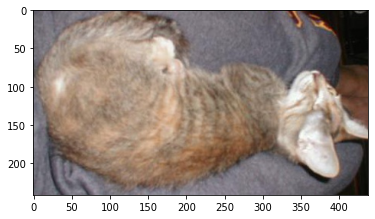

In [ ]:
import os
from skimage.io import imread
path = '/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/'

img1 = imread('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/cat/cat_0001.jpg')
img2 = imread('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/dog/dog_0005.jpg')

plt.imshow(img1)



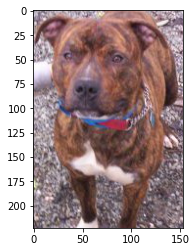

In [ ]:
plt.imshow(img2)

## Distribution of images

Text(0.5, 1.0, 'Number of Training images per Class:')

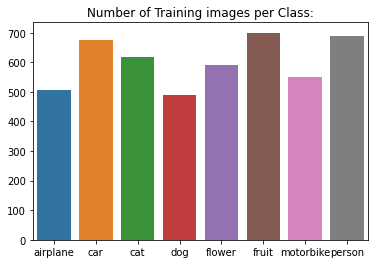

In [ ]:
train_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train"
val_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/"
test_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/"
class_names = sorted(os.listdir(train_data_dir))

train_img_cat = []
val_img_cat = []
test_img_cat = []
for classes in class_names:
    train_folder = train_data_dir + '/' + classes
    train_img_cat.append(len(os.listdir(train_folder)))

for classes in class_names:
    val_folder = val_data_dir + '/' + classes
    val_img_cat.append(len(os.listdir(val_folder)))

for classes in class_names:
    test_folder = test_data_dir + '/' + classes
    test_img_cat.append(len(os.listdir(test_folder)))

sns.barplot(x=class_names, y=train_img_cat).set_title("Number of Training images per Class:")

Text(0.5, 1.0, 'Number of Validation images per Class:')

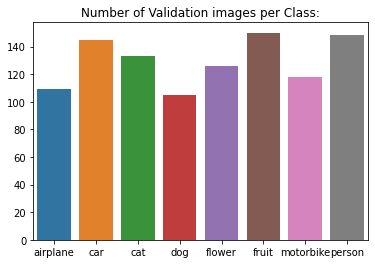

In [ ]:
sns.barplot(x=class_names, y=val_img_cat).set_title("Number of Validation images per Class:")

Text(0.5, 1.0, 'Number of Testing images per Class:')

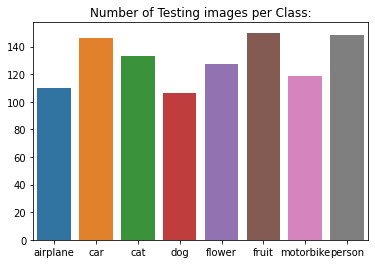

In [ ]:
sns.barplot(x=class_names, y=test_img_cat).set_title("Number of Testing images per Class:")

## Random images from each class

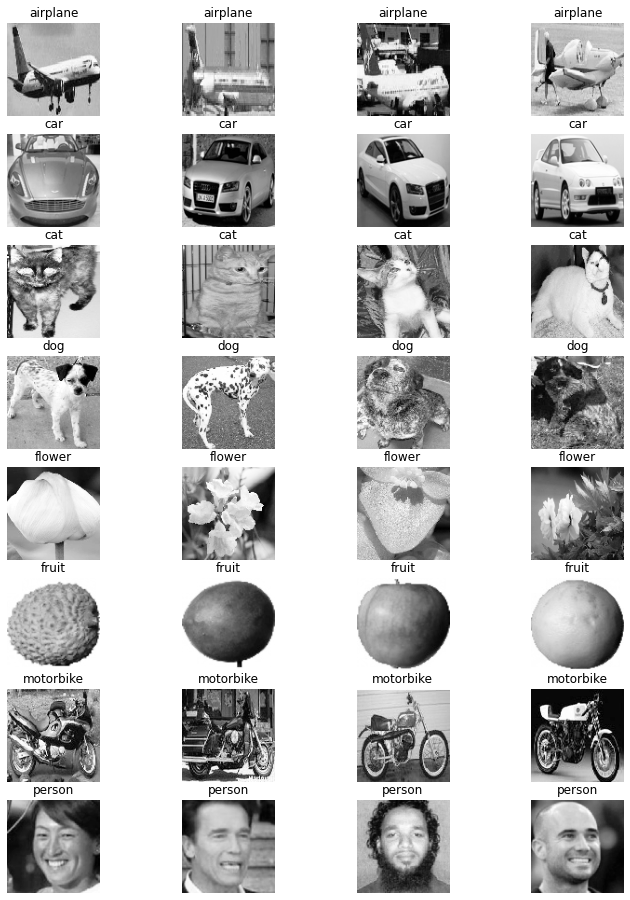

(508, 677, 619, 491, 590, 700, 551, 690)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

# get the list of jpgs from sub image class folders
airplane_img = [cl for cl in os.listdir(f'{train_data_dir}/airplane') if cl.endswith('.jpg')]
car_img = [cl for cl in os.listdir(f'{train_data_dir}/car') if cl.endswith('.jpg')]
cat_img = [cl for cl in os.listdir(f'{train_data_dir}/cat') if cl.endswith('.jpg')]
dog_img = [cl for cl in os.listdir(f'{train_data_dir}/dog') if cl.endswith('.jpg')]
flower_img = [cl for cl in os.listdir(f'{train_data_dir}/flower') if cl.endswith('.jpg')]
fruit_img = [cl for cl in os.listdir(f'{train_data_dir}/fruit') if cl.endswith('.jpg')]
motorbike_img = [cl for cl in os.listdir(f'{train_data_dir}/motorbike') if cl.endswith('.jpg')]
person_img = [cl for cl in os.listdir(f'{train_data_dir}/person') if cl.endswith('.jpg')]

# randomly selecting 4 images from each class
select_air = np.random.choice(airplane_img, 4, replace = False)
select_car = np.random.choice(car_img, 4, replace = False)
select_cat = np.random.choice(cat_img, 4, replace = False)
select_dog = np.random.choice(dog_img, 4, replace = False)
select_flower = np.random.choice(flower_img, 4, replace = False)
select_fruit = np.random.choice(fruit_img, 4, replace = False)
select_motorbike = np.random.choice(motorbike_img, 4, replace = False)
select_person = np.random.choice(person_img, 4, replace = False)

# plotting 8 x 4 image matrix
fig = plt.figure(figsize = (12,16))
for i in range(32):
    if i < 4:
        fp = f'{train_data_dir}/airplane/{select_air[i]}'
        label = 'airplane'
    elif i < 8:
        fp = f'{train_data_dir}/car/{select_car[i-8]}'
        label = 'car'
    elif i < 12:
        fp = f'{train_data_dir}/cat/{select_cat[i-12]}'
        label = 'cat'
    elif i < 16:
        fp = f'{train_data_dir}/dog/{select_dog[i-16]}'
        label = 'dog'
    elif i < 20:
        fp = f'{train_data_dir}/flower/{select_flower[i-20]}'
        label = 'flower'
    elif i < 24:
        fp = f'{train_data_dir}/fruit/{select_fruit[i-24]}'
        label = 'fruit'
    elif i < 28:
        fp = f'{train_data_dir}/motorbike/{select_motorbike[i-28]}'
        label = 'motorbike'
    else:
        fp = f'{train_data_dir}/person/{select_person[i-32]}'
        label = 'person'
        
    ax = fig.add_subplot(8, 4, i+1)
    
    # Plotting without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# number of images in each class
len(airplane_img), len(car_img), len(cat_img), len(dog_img), len(flower_img), len(fruit_img), len(motorbike_img), len(person_img)

## More visualization

In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
airplane_images = img2np(f'{train_data_dir}/airplane/', airplane_img)
car_images = img2np(f'{train_data_dir}/car/', car_img)

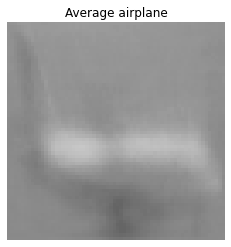

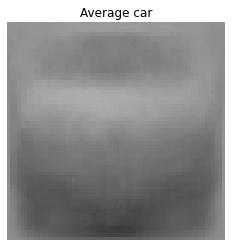

In [ ]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

air_mean = find_mean_img(airplane_images, 'airplane')
car_mean = find_mean_img(car_images, 'car')

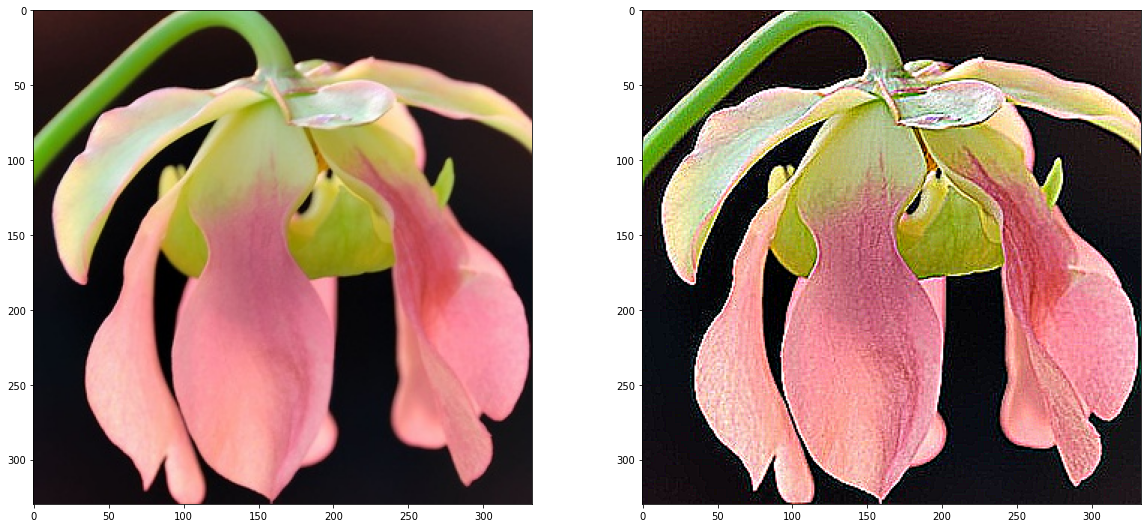

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
b=cv2.imread('/content/drive/MyDrive/Thesis_Natural_Images/Dataset/Train/flower/flower_0038.jpg')
b=cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(b)
k=np.array([[-1,-1,-1],
            [-1,9,-1],
            [-1,-1,-1]])
sh=cv2.filter2D(b,-1,k)
plt.subplot(2,2,2)
plt.imshow(sh)
plt.show()

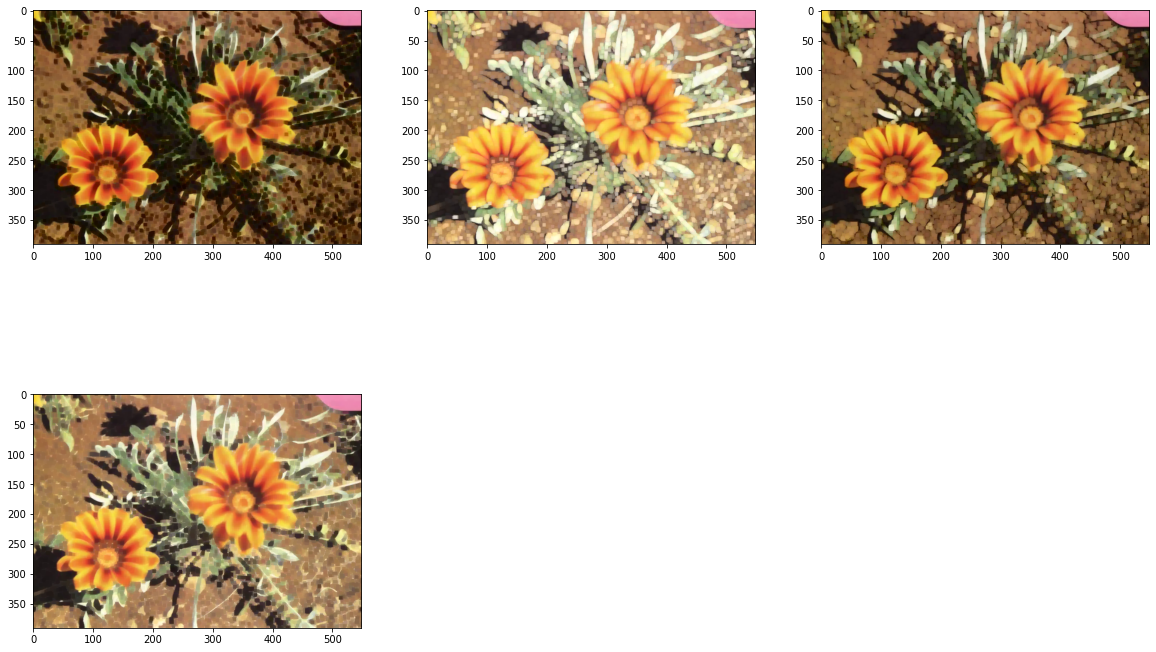

In [ ]:
k=np.ones((5,5),np.uint8)
b=cv2.imread('/content/drive/MyDrive/Thesis_Natural_Images/Dataset/Train/flower/flower_0149.jpg')
b=cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
c=cv2.erode(b,k,iterations=1)
plt.subplot(3,3,1)
plt.imshow(c)
d=cv2.dilate(b,k,iterations=1)
plt.subplot(3,3,2)
plt.imshow(d)
e=cv2.morphologyEx(b,cv2.MORPH_OPEN,k)
plt.subplot(3,3,3)
plt.imshow(e)
f=cv2.morphologyEx(b,cv2.MORPH_CLOSE,k)
plt.subplot(3,3,4)
plt.imshow(f)

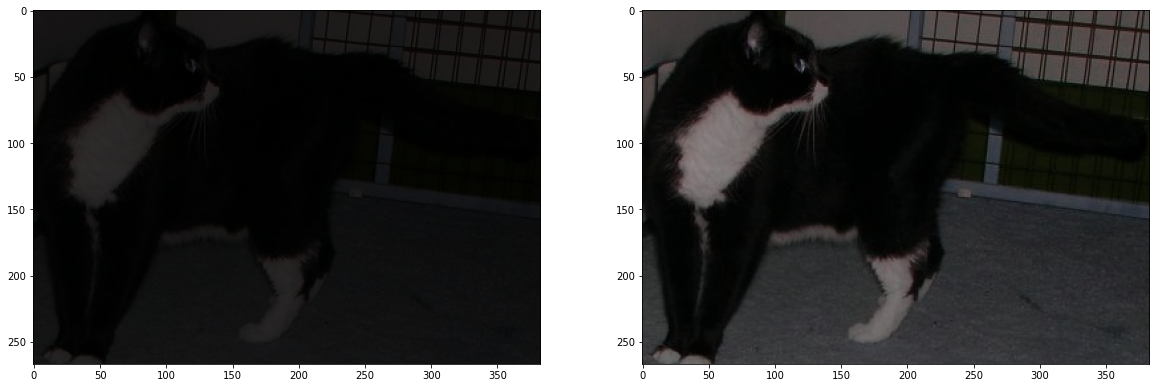

In [ ]:
b = cv2.imread('/content/drive/MyDrive/Thesis_Natural_Images/Dataset/Train/cat/cat_0623.jpg')
c = cv2.imread('/content/drive/MyDrive/Thesis_Natural_Images/Dataset/Train/cat/cat_0623.jpg')
d=cv2.addWeighted(b,0,c,0.2,0)
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(d)
plt.subplot(222)
b=cv2.addWeighted(b,0.6,c,0,0)

plt.imshow(b)

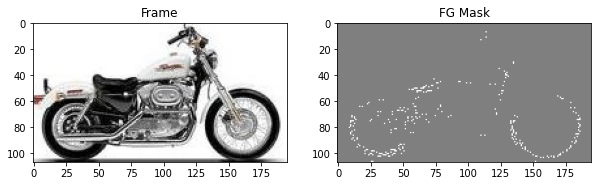

In [ ]:
import cv2 
import matplotlib.pyplot as plt

algo = 'MOG2'

if algo == 'MOG2':
    backSub = cv2.createBackgroundSubtractorMOG2()
else:
    backSub = cv2.createBackgroundSubtractorKNN()

plt.figure(figsize=(10, 10))

frame = cv2.imread('/content/drive/MyDrive/Thesis_Natural_Images/Dataset/Train/motorbike/motorbike_0021.jpg')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 1)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))